In [1]:
import numpy as np
import matplotlib.pyplot as plt
import muram as mio
from astropy.io import fits
import pyflct

In [56]:
from matplotlib import font_manager
import matplotlib as mpl
font_path = '/home/flow/.fonts/cmunrm.ttf'  # Your font path goes here
#font_path = '/usr/share/fonts/opentype/urw-base35/NimbusRoman-Italic.otf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
mpl.rcParams["font.size"] = 12
mpl.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
#plt.rc('text', usetex=True)
plt.rc('axes', unicode_minus=False)

In [3]:
synth = fits.open("0_lwsynth_525.0.fits")[0].data
synth_conv = fits.open("0_lwsynth_525.0_convolved.fits")[0].data
cubeM = mio.MuramIntensity("", 0)

RMS for simulation: 0.23475882732567044
RMS for LW: 0.2080254852771759


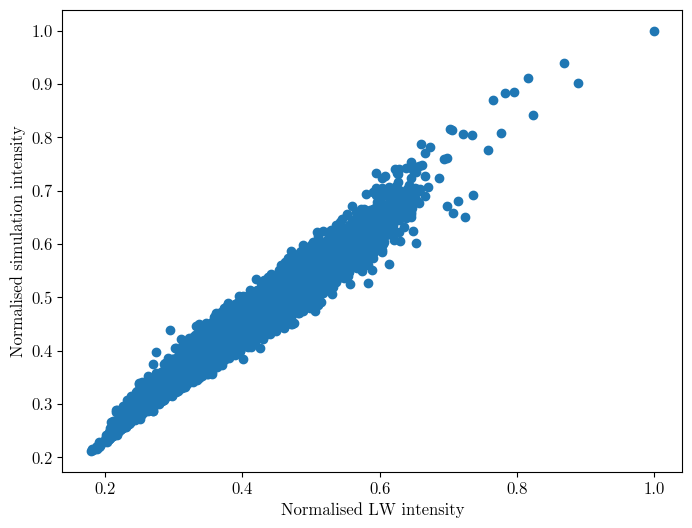

In [4]:
# Comparison of intensity taken from simulation and one that LW calculated
# Plotting normalized intensities + deriving RMS contrast
I1 = np.copy(synth[:,:,0,0])
I_M = cubeM[::2,::2]
I_M = I_M/np.max(I_M)
I1 = I1/np.max(I1)

fig = plt.figure(figsize = (8,6))
plt.scatter(I1,I_M)
plt.xlabel("Normalised LW intensity")
plt.ylabel("Normalised simulation intensity")
#plt.show()
plt.savefig("PoredjenjeInte.png", dpi = 300)

RMS_I1 = np.std(I1)/np.mean(I1)
print("RMS for simulation: {}".format(RMS_I1))

RMS_s = np.std(I_M)/np.mean(I_M)
print("RMS for LW: {}".format(RMS_s))

In [5]:
from astropy.io import fits
import sys
import os
from scipy.stats import pearsonr

In [6]:
filenames = []
for file in sorted(os.listdir (os.getcwd())):
	if file.startswith("tau_slice_1.000"):
		#print (file)
		filenames.append(file)
print ("How many files are in directory: {}".format(len(filenames)))

How many files are in directory: 2


In [7]:
T_array = []
Vx_array = []
Vy_array = []
I_continuum = []
cubeM_2 = mio.MuramIntensity("", 50)

In [8]:
data_full1 = np.fromfile("tau_slice_1.000.000000", dtype="float32")
data1 = data_full1[4:].reshape(11, 1536, 1536)

data_full2 = np.fromfile("tau_slice_1.000.000050", dtype="float32")
data2 = data_full2[4:].reshape(11, 1536, 1536)

T_1 = data1[8,:,:]
T_2 = data2[8,:,:]

In [9]:
delta_t = 10.0 * 3
pixelsize = 16.0
sigma = 1200.0 / 1.665 / pixelsize

In [10]:
T_1.shape

(1536, 1536)

In [11]:
cubeM.shape

(1536, 1536)

In [12]:
Temp1 = T_1**4
Temp2 = T_2**4

In [13]:
# Calculating and plotting correlation between T^4 and I
r_pre_obrade = pearsonr(cubeM.flatten(), Temp1.flatten())
print(r_pre_obrade)

PearsonRResult(statistic=0.016994910154023383, pvalue=3.1122080596324443e-150)


In [14]:
r_pre_obrade50 = pearsonr(cubeM_2.flatten(), Temp2.flatten())
print(r_pre_obrade50)

PearsonRResult(statistic=0.014911367286913148, pvalue=4.13104429136706e-116)


In [15]:
r_T = pearsonr(cubeM_2.flatten(), T_2.flatten())
print(r_T)

PearsonRResult(statistic=0.014915297288886704, pvalue=3.596496136783558e-116)


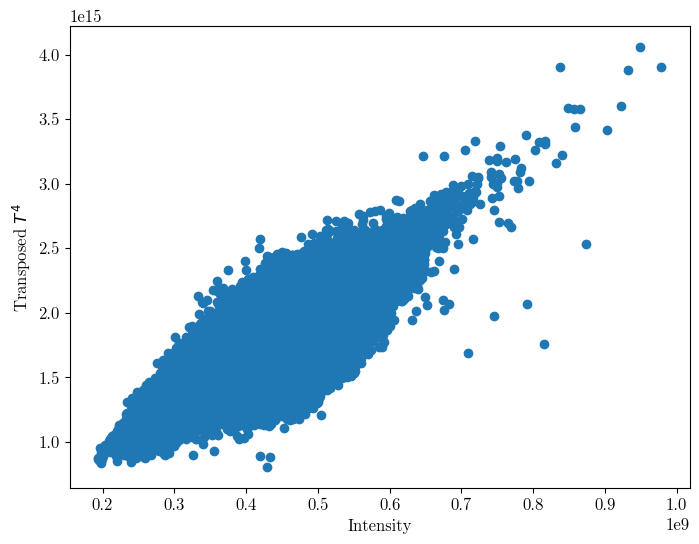

In [16]:
fig = plt.figure(figsize = (8,6))
plt.scatter(cubeM, Temp1.T)
plt.xlabel("Intensity")
plt.ylabel("Transposed $T^4$")
#plt.show()
plt.savefig("TempInte.png", dpi = 300)


In [17]:
Vx_1200 = fits.open("pyFLCT_fwhm_1200_dt_30_Inte_tracked.fits")[0].data
Vy_1200 = fits.open("pyFLCT_fwhm_1200_dt_30_Inte_tracked.fits")[1].data

In [18]:
Vx_T = fits.open("pyFLCT_fwhm_1200_dt_30_T_tracked.fits")[0].data
Vy_T = fits.open("pyFLCT_fwhm_1200_dt_30_T_tracked.fits")[1].data

FileNotFoundError: [Errno 2] No such file or directory: 'pyFLCT_fwhm_1200_dt_30_T_tracked.fits'

In [ ]:
Vx_T4 = fits.open("pyFLCT_fwhm_1200_dt_30_TTTT_tracked.fits")[0].data
Vy_T4 = fits.open("pyFLCT_fwhm_1200_dt_30_TTTT_tracked.fits")[1].data

In [18]:
# Define function for temporal averaging
def temporal_avg(data_in, start, end):
    tmp_avg = np.mean(data_in[start:end], axis = 0)
    return tmp_avg

In [ ]:
# After that, we shall load velocities taken directly from simulation
Vx = fits.open("Velocities_TAU_1_0.fits")[1].data # Vy from Velocities.fits as originally thought
Vy = fits.open("Velocities_TAU_1_0.fits")[0].data # Vx from Velocities.fits as originally thought
Vx = Vx.transpose(0, 2, 1)
Vy = Vy.transpose(0, 2, 1)

<h2>Comparing velocities derived from T and from I</h2>

In [ ]:
Vx_FLCT_1200 = temporal_avg(Vx_1200, 0, 90)
Vy_FLCT_1200 = temporal_avg(Vy_1200, 0, 90)

In [ ]:
Vx_FLCT_T = temporal_avg(Vx_T, 0, 90)
Vy_FLCT_T = temporal_avg(Vy_T, 0, 90)

In [ ]:
Vx_FLCT_T4 = temporal_avg(Vx_T4, 0, 90)
Vy_FLCT_T4 = temporal_avg(Vy_T4, 0, 90)

In [ ]:
from scipy.ndimage import gaussian_filter

In [ ]:
Vx_mean_sim = temporal_avg(Vx, 0, 90)
Vx_mean_sim = Vx_mean_sim/1E5

Vy_mean_sim = temporal_avg(Vy, 0, 90)
Vy_mean_sim = Vy_mean_sim/1E5

In [ ]:
Vx_filtered35 = gaussian_filter(Vx_mean_sim, 35, mode = "wrap")
Vy_filtered35 = gaussian_filter(Vy_mean_sim, 35, mode = "wrap")

In [ ]:
r_x_T = pearsonr(Vx_FLCT_1200.flatten(), Vx_FLCT_T.flatten())
print(r_x_T)

In [ ]:
r_y_T = pearsonr(Vy_FLCT_1200.flatten(), Vy_FLCT_T.flatten())
print(r_y_T)

In [ ]:
r_x_T4 = pearsonr(Vx_FLCT_1200.flatten(), Vx_FLCT_T4.flatten())
print(r_x_T4)

In [ ]:
r_y_T4 = pearsonr(Vy_FLCT_1200.flatten(), Vy_FLCT_T4.flatten())
print(r_y_T4)

In [18]:
from scipy.stats import linregress

In [ ]:
plt.figure(figsize = (8,4))
#niz = [r_x_T[0], r_x_T4[0]]
#niz2 = [np.mean(Vx_FLCT_T), np.mean(Vx_FLCT_T4)]
#plt.suptitle("Promena koeficijenta pravca u zavisnosti od vrednosti FHWM")
plt.scatter(Vx_FLCT_1200.flatten(), Vx_FLCT_T.flatten(),  s = 0.001, color = "red")
plt.ylabel("Vx derived from temperature[km/s]")
plt.xlabel("Vx derived from intensity[km/s]")
m1, b1, *_ = linregress(Vx_FLCT_1200.flatten(), Vx_FLCT_T.flatten())
plt.axline(xy1=(0, b1), slope=m1, label=f'$y = {m1:.3f}x {b1:+.3f}$')
plt.legend()
plt.tight_layout()
plt.savefig("Inte_T_T4.png", bbox_inches = 'tight', dpi = 300)

In [ ]:
plt.figure(figsize = (8,4))
#niz = [r_x_T[0], r_x_T4[0]]
#niz2 = [np.mean(Vx_FLCT_T), np.mean(Vx_FLCT_T4)]
#plt.suptitle("Promena koeficijenta pravca u zavisnosti od vrednosti FHWM")
plt.scatter(Vx_FLCT_1200.flatten(), Vx_FLCT_T4.flatten(),  s = 0.001, color = "red")
plt.ylabel("Vx derived from $T^4$[km/s]")
plt.xlabel("Vx derived from intensity[km/s]")
m2, b2, *_ = linregress(Vx_FLCT_1200.flatten(), Vx_FLCT_T4.flatten())
plt.axline(xy1=(0, b2), slope=m2, label=f'$y = {m2:.3f}x {b2:+.3f}$')
plt.legend()
plt.tight_layout()
plt.savefig("Inte_T4.png", bbox_inches = 'tight', dpi = 300)

In [ ]:
print(Vx_FLCT_T)

In [ ]:
print(Vx_FLCT_1200)

<h2>FLCT T, T<sup>4</sup>, Intensity vs Simulation velocities</h2>

In [ ]:
r_x_Tvsim = pearsonr(Vx_FLCT_T.flatten(), Vx_filtered35.flatten())
print(r_x_Tvsim)

In [ ]:
r_y_Tvsim = pearsonr(Vy_FLCT_T.flatten(), Vy_filtered35.flatten())
print(r_y_Tvsim)

In [ ]:
r_x_T4vsim = pearsonr(Vx_FLCT_T4.flatten(), Vx_filtered35.flatten())
print(r_x_T4vsim)

In [ ]:
r_y_T4vsim = pearsonr(Vy_FLCT_T4.flatten(), Vy_filtered35.flatten())
print(r_y_T4vsim)

In [ ]:
r_x_Ivssim = pearsonr(Vx_FLCT_1200.flatten(), Vx_filtered35.flatten())
print(r_x_Ivssim)

In [ ]:
r_y_Ivssim = pearsonr(Vy_FLCT_1200.flatten(), Vy_filtered35.flatten())
print(r_y_Ivssim)

In [ ]:
r_x_TT = pearsonr(Vx_FLCT_T.flatten(), Vx_FLCT_T4.flatten())
print(r_x_TT)

In [ ]:
mT, bT, *_ = linregress(Vx_filtered35.flatten(), Vx_FLCT_T.flatten())
mT4, bT4, *_ = linregress(Vx_filtered35.flatten(), Vx_FLCT_T4.flatten())
mI, bI, *_ = linregress(Vx_filtered35.flatten(), Vx_FLCT_1200.flatten())

In [ ]:
plt.figure(figsize = (8,4))
niz = [r_x_Tvsim[0], r_x_T4vsim[0], r_x_Ivssim[0]]
niz2 = [mT, mT4, mI]
marker_styles = ['o', 's', '^']
colors = ['green', 'purple', 'orange']
#plt.suptitle("Promena koeficijenta pravca u zavisnosti od vrednosti FHWM")
plt.scatter(niz2[0], niz[0], marker=marker_styles[0], c=colors[0], label=f'T')
plt.scatter(niz2[1], niz[1], marker=marker_styles[1], c=colors[1], label=f'$T^4$')
plt.scatter(niz2[2], niz[2], marker=marker_styles[2], c=colors[2], label=f'Intensity')
plt.ylabel("Pearson's coefficient for x-component")
plt.xlabel("Linear fit slopes of simulation/parameter  ")
plt.tight_layout()
plt.legend()
plt.savefig("Real_vs_derivedT.png", bbox_inches = 'tight', dpi = 300)

In [ ]:
# More data analysis

In [19]:
cube = fits.open("1800_lwsynth_100.0.fits")[0].data

In [20]:
info = fits.open("1800_lwsynth_100.0.fits")[1].data

In [21]:
print(info)

[ 100.      200.      300.      400.      500.      600.      700.
  800.      900.     1000.     1100.     1200.     1300.     1400.
 1500.     1600.     1700.     1800.     1900.     2000.     2100.
  525.      525.0005  525.001   525.0015  525.002   525.0025  525.003
  525.0035  525.004   525.0045  525.005   525.0055  525.006   525.0065
  525.007   525.0075  525.008   525.0085  525.009   525.0095  525.01
  525.0105  525.011   525.0115  525.012   525.0125  525.013   525.0135
  525.014   525.0145  525.015   525.0155  525.016   525.0165  525.017
  525.0175  525.018   525.0185  525.019   525.0195  525.02    525.0205
  525.021   525.0215  525.022   525.0225  525.023   525.0235  525.024
  525.0245  525.025   525.0255  525.026   525.0265  525.027   525.0275
  525.028   525.0285  525.029   525.0295  525.03    525.0305  525.031
  525.0315  525.032   525.0325  525.033   525.0335  525.034   525.0345
  525.035   525.0355  525.036   525.0365  525.037   525.0375  525.038
  525.0385  525.039   525

In [22]:
Intensity = cube[:,:,0,:]

In [46]:
I_qs = np.mean(Intensity[:,:,21])
print(I_qs)

3.816607293841542e-08


In [23]:
print(Intensity[0,0])

[5.09825587e-19 2.19513794e-11 8.59731459e-09 2.40982764e-08
 3.07885011e-08 3.51553137e-08 3.75474130e-08 3.84211172e-08
 3.85874596e-08 3.81060435e-08 3.73086042e-08 3.65205096e-08
 3.57872395e-08 3.51412524e-08 3.48752556e-08 3.35488210e-08
 3.10214739e-08 2.83214778e-08 2.59091393e-08 2.37964833e-08
 2.19461287e-08 3.20796824e-08 3.20780332e-08 3.20762651e-08
 3.20743663e-08 3.20723237e-08 3.20701224e-08 3.20677455e-08
 3.20651736e-08 3.20623848e-08 3.20593537e-08 3.20560512e-08
 3.20524435e-08 3.20484912e-08 3.20441484e-08 3.20393608e-08
 3.20340641e-08 3.20281818e-08 3.20216216e-08 3.20142718e-08
 3.20059953e-08 3.19966223e-08 3.19859396e-08 3.19736741e-08
 3.19594679e-08 3.19428337e-08 3.19230705e-08 3.18990909e-08
 3.18690601e-08 3.18296493e-08 3.17745678e-08 3.16918725e-08
 3.15594678e-08 3.13384135e-08 3.09645386e-08 3.03410157e-08
 2.93387534e-08 2.78182451e-08 2.56910046e-08 2.30204127e-08
 2.00927507e-08 1.73292759e-08 1.50348232e-08 1.32318881e-08
 1.17403232e-08 1.037721

In [71]:
#Int_cont = Intensity[:,:,27]
#Int_wing = Intensity[:,:,62]
#Int_center = Intensity[:,:,67]
Int_cont = Intensity[:, :, 35]
Int_wing = Intensity[:, :, 63]
Int_center = Intensity[:, :, 68]

In [25]:
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
from mpl_toolkits import axes_grid1

In [37]:
def add_colorbar(im, aspect=20, pad_fraction=0.5, **kwargs):
    """Add a vertical color bar to an image plot."""
    divider = axes_grid1.make_axes_locatable(im.axes)
    width = axes_grid1.axes_size.AxesY(im.axes, aspect=1./aspect)
    pad = axes_grid1.axes_size.Fraction(pad_fraction, width)
    current_ax = plt.gca()
    cax = divider.append_axes("right", size=width, pad=pad)
    plt.sca(current_ax)
    return im.axes.figure.colorbar(im, cax=cax, **kwargs)

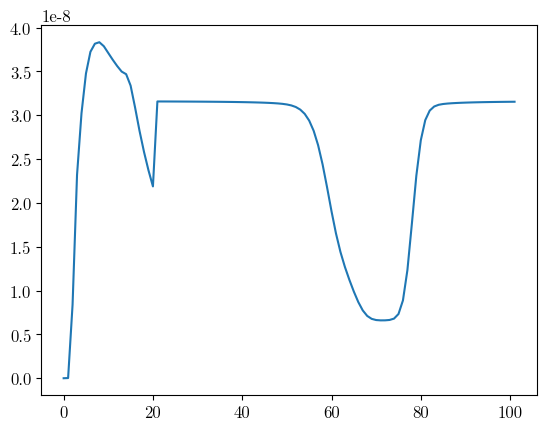

In [26]:
plt.plot(Intensity[1, 1, :])

In [27]:
Intensity_lambda = np.linspace(525.0, 525.04, num = 81, endpoint = True)

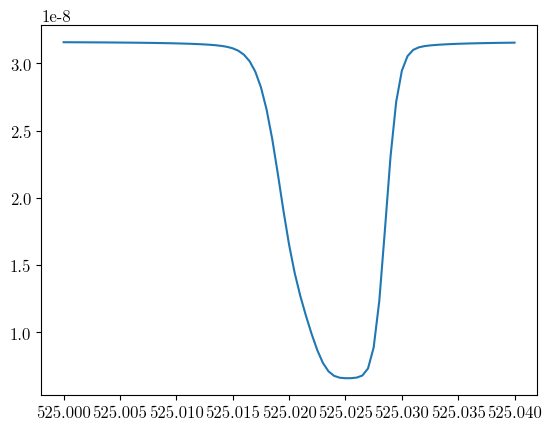

In [28]:
plt.plot(Intensity_lambda, Intensity[1,1,21:])

In [29]:
np.shape(Intensity)

(1536, 1536, 102)

In [33]:
Line_mean = np.mean(Intensity[:,:,21:], axis = (0,1))

In [34]:
np.shape(Line_mean)

(81,)

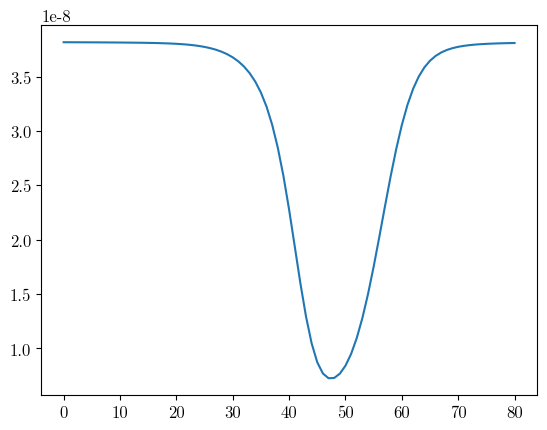

In [35]:
plt.plot(Line_mean)

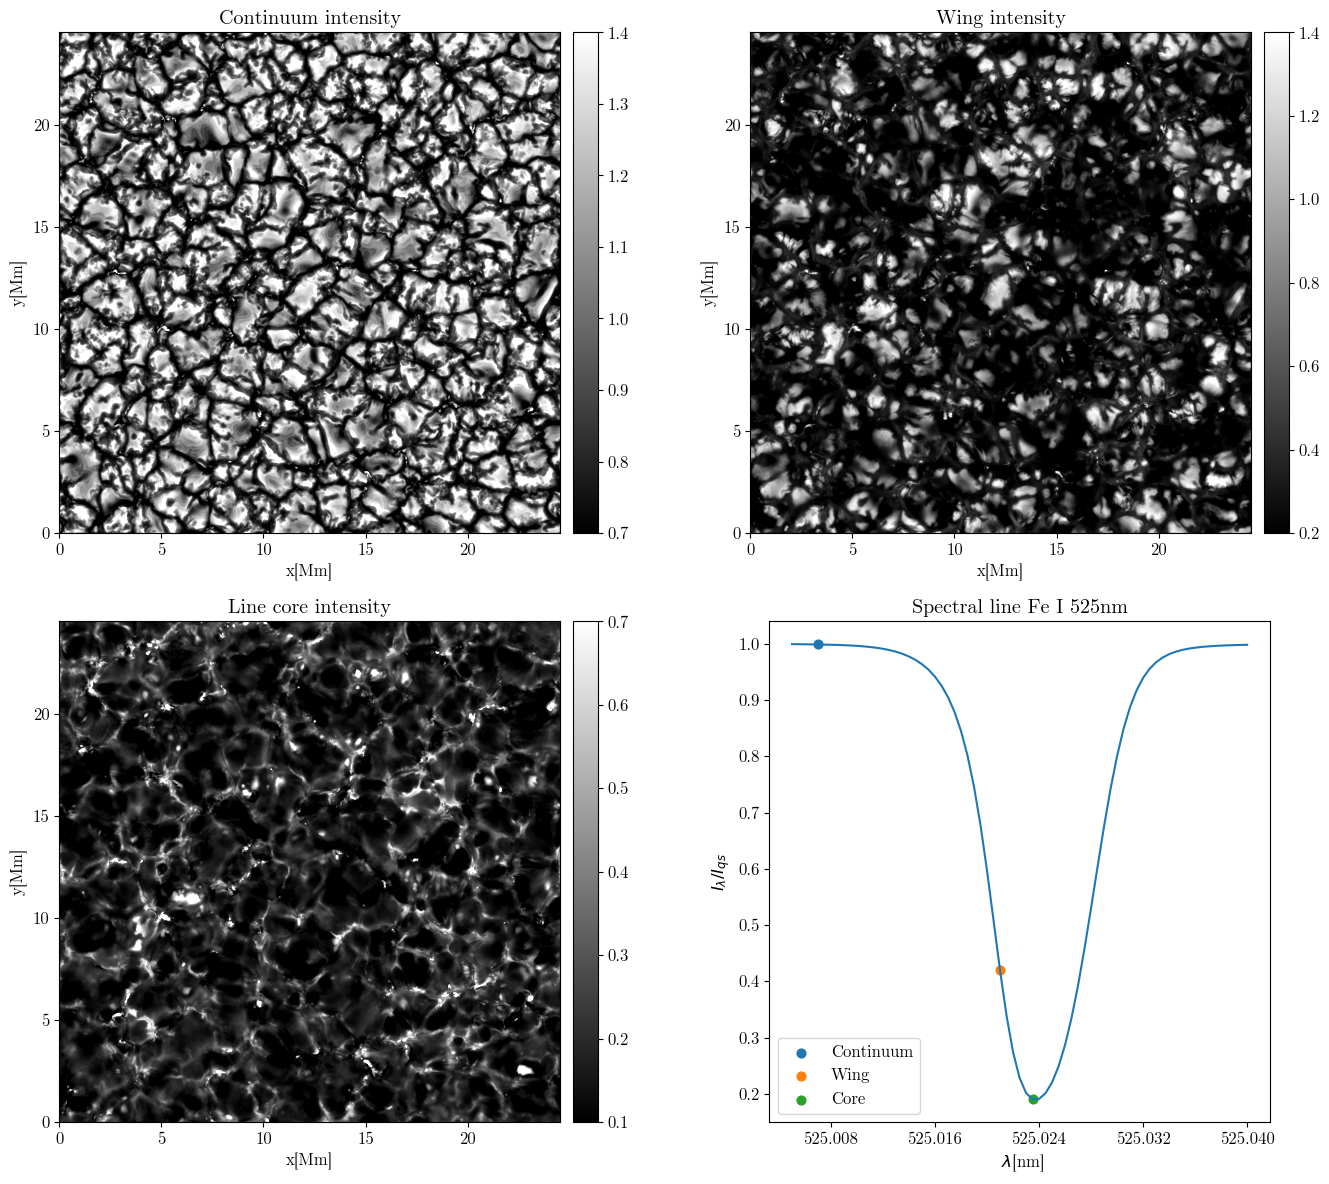

In [85]:
f = plt.figure(figsize = (14,12))
#fig, axs = plt.subplots(2, 2, figsize=(16,9))
ax1 = f.add_subplot(221)
#ax1 = axs[0,0]
ax1.set_title("Continuum intensity")
ax1.set_xlabel("x[Mm]")
ax1.set_ylabel("y[Mm]")
im1 = ax1.imshow(Int_cont/I_qs, origin='lower', cmap = "grey", extent = (0, 24.536, 0, 24.536), vmin = 0.7, vmax = 1.4)
add_colorbar(im1)

#ax2 = plt.subplot2grid((4,3), (0,1))
ax2 = f.add_subplot(222)
#ax2 = axs[0,1]
ax2.set_title("Wing intensity")
ax2.set_xlabel("x[Mm]")
ax2.set_ylabel("y[Mm]")
im2 = ax2.imshow(Int_wing/I_qs, origin='lower', cmap = "grey", extent = (0, 24.536, 0, 24.536), vmin = 0.2, vmax = 1.4)
add_colorbar(im2)

ax3 = f.add_subplot(223)
#ax3 = axs[1,0]
ax3.set_title("Line core intensity")
ax3.set_xlabel("x[Mm]")
ax3.set_ylabel("y[Mm]")
im3 = ax3.imshow(Int_center/I_qs, origin='lower', cmap = "grey", extent = (0, 24.536, 0, 24.536), vmin = 0.1, vmax = 0.7)
add_colorbar(im3)

ax4 = f.add_subplot(224)
#ax4 = axs[1,1]
im4 = ax4.plot(Intensity_lambda[10:], Line_mean[10:]/np.max(Line_mean))
s1 = ax4.scatter(Intensity_lambda[14], Line_mean[14]/np.max(Line_mean), label = "Continuum", marker = "o", s = 40)
s2 = ax4.scatter(Intensity_lambda[42], Line_mean[42]/np.max(Line_mean), label = "Wing", marker = "o", s = 40)
s3 = ax4.scatter(Intensity_lambda[47], Line_mean[47]/np.max(Line_mean), label = "Core", marker = "o", s = 40)
ax4.set_title("Spectral line Fe I 525nm")
ax4.set(xlabel=" $\lambda$[nm]", ylabel = "$I_\lambda/I_{qs}$")
ax4.set_xticks(np.arange(525.008, 525.041, 0.008))
asp = np.diff(ax4.get_xlim())[0] / np.diff(ax4.get_ylim())[0]
asp /= np.abs(np.diff(ax1.get_xlim())[0] / np.diff(ax1.get_ylim())[0])
ax4.set_aspect(asp)
ax4.legend()

#plt.show()
plt.tight_layout()
plt.savefig("3Lambdas.png", dpi = 100, bbox_inches = 'tight')

In [55]:
Intensity_lambda = np.linspace(525.0, 525.04, num = 81, endpoint = False)

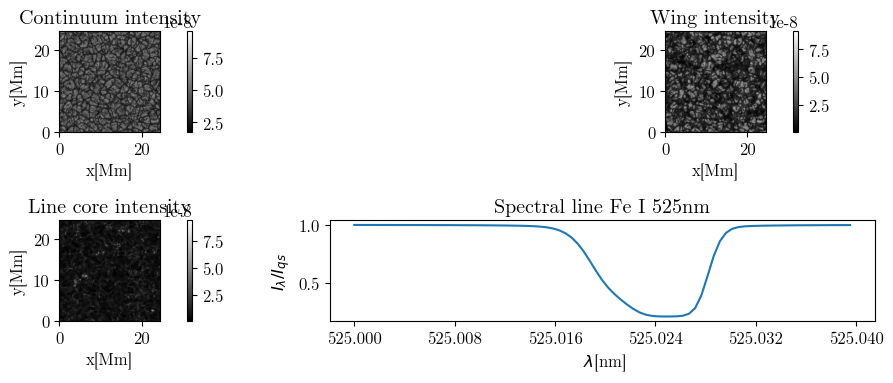

In [58]:
#fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 8))

#plt.suptitle("Linear fit of FLCT Vx and convolved Vx from simulation for FHWM = {1200, 600, 300, 100}km")
# 4x3 plot, velicina A, velicina B, scatter A i B!!!
#ax1 = plt.subplot2grid((4,3), (0,0))
fig = plt.figure(figsize = (12, 4))       
plt.subplot(221)                                      # atmos[1] temp
plt.title("Continuum intensity")
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Int_cont, origin='lower', cmap = "grey", extent = (0, 24.536, 0, 24.536))
plt.colorbar()

plt.subplot(222)                                      # atmos[1] temp
plt.title("Wing intensity")
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Int_wing, origin='lower', cmap = "grey", extent = (0, 24.536, 0, 24.536))
plt.colorbar()


plt.subplot(223)                                      # atmos[1] temp
plt.title("Line core intensity")
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Int_center, origin='lower', cmap = "grey", extent = (0, 24.536, 0, 24.536))
plt.colorbar()

plt.subplot(224)
plt.plot(Intensity_lambda, Intensity[1,1,21:]/np.max(Intensity[1,1,21:]))
plt.title("Spectral line Fe I 525nm")
plt.xlabel(" $\lambda$[nm]")
plt.ylabel("$I_\lambda/I_{qs}$")
#ax4.set_xticks(np.arange(525.0,525.04,0.005)*1E-9, [525.005, 525.01, 525.015, 525.02, 525.025, 525.03, 525.035, 525.04])
plt.xticks(np.arange(525.0, 525.041, 0.008)) 

plt.tight_layout()
plt.savefig("3Lambdas.png", dpi = 180, bbox_inches = 'tight')